# run synthesize 009.json


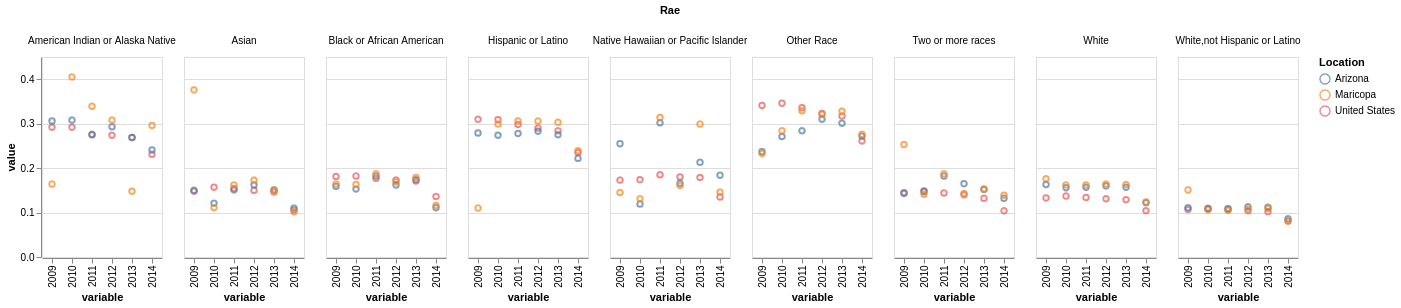

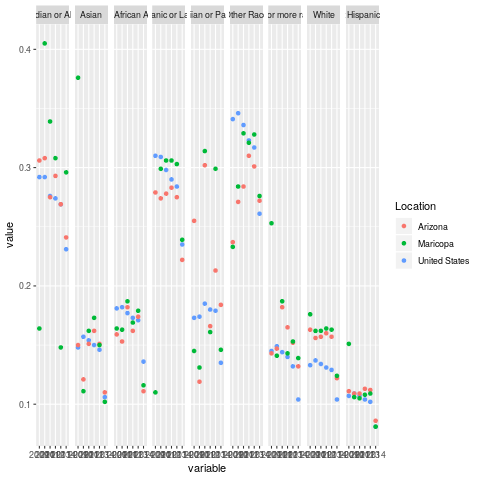

# run synthesize 010.json


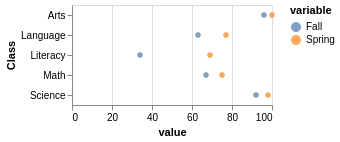

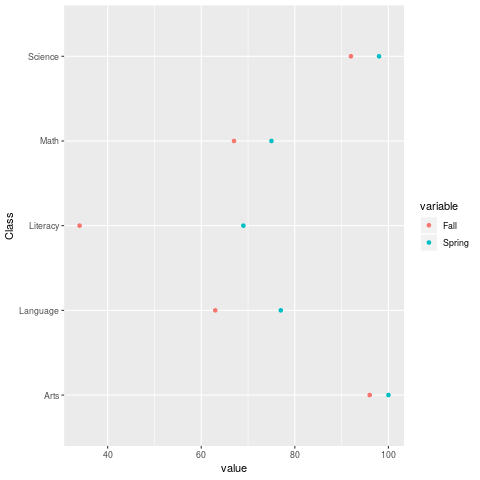

# run synthesize 011.json


KeyError: 'row'

# run synthesize 012.json


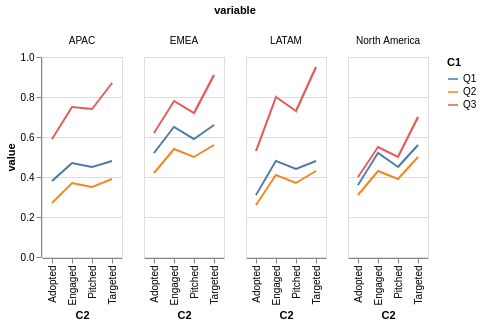

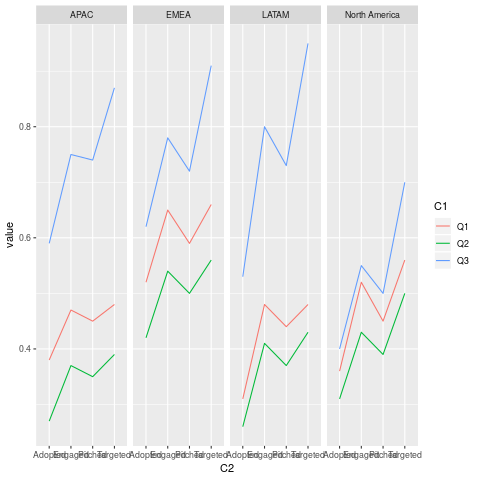

# run synthesize 013.json


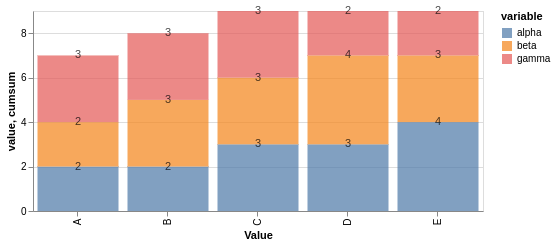

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: order

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: text



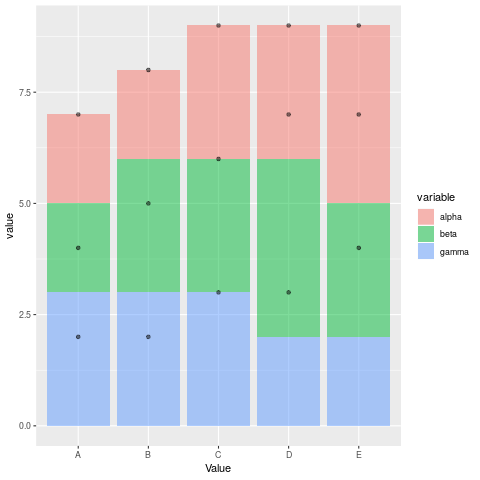

# run synthesize 014.json


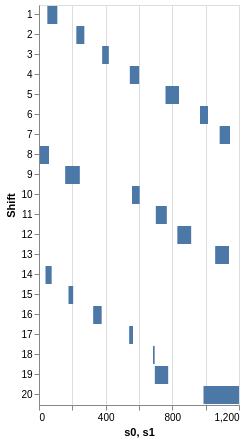

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: x



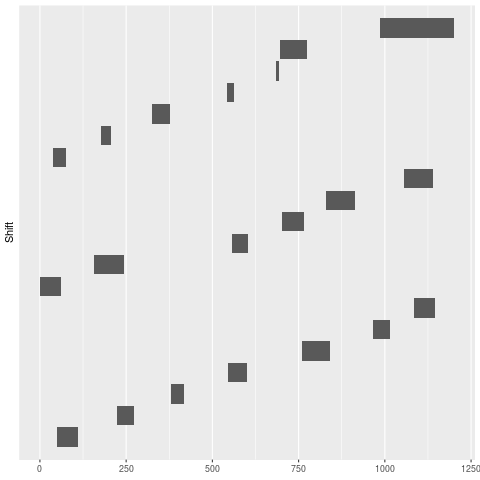

# run synthesize 015.json


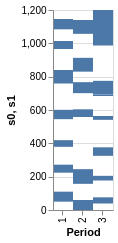

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: y2



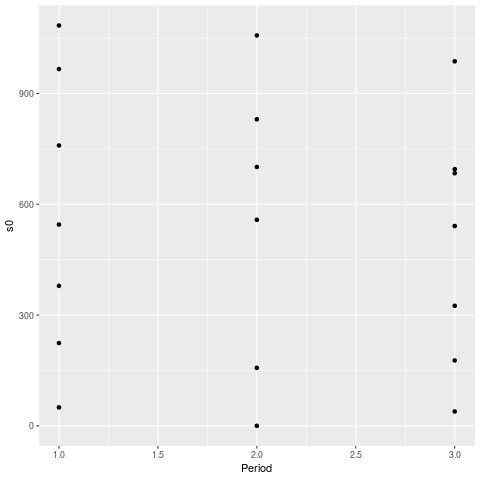

In [2]:
import rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

%reload_ext rpy2.ipython

import json
import pandas as pd
import os
from vega import VegaLite
from ipywidgets import widgets

from falx.chart import *
from interface import Falx

DATA_DIR = os.path.join("..", "benchmarks")

def try_example(fname):

    with open(os.path.join(DATA_DIR, fname), "r") as f:
        data = json.load(f)

    print("# run synthesize {}".format(fname))

    input_data = table_utils.load_and_clean_table(data["input_data"])
    vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
    
    ggplot_script = vis.to_ggplot2()
    
    # display plot
    VegaLite(vis.to_vl_obj()).display()
        
    for l in ggplot_script:
        %R -i l
        %R eval(parse(text=l))
    %R print(p)
    
text_box = widgets.Text(value='004.json')
button = widgets.Button(description="run")

display(text_box)
display(button)

def on_button_clicked(b):
    try_example(text_box.value)

button.on_click(on_button_clicked)
